In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from torch.utils.data import random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)), # Resize images to 32x32
    transforms.ToTensor(), # Convert to tensor of shape:(3, 32, 32) and values: [0, 1]
    transforms.Lambda(lambda x: x.view(-1))  # Flatten 3D temsor to 1D vector for sklearn
])

#Path variables to data directory
data_path = 'SENG_474_Dataset_Filtered'
full_dataset = datasets.ImageFolder(data_path, transform=transform)

# 3-way split split
train_size = int(0.8 * len(full_dataset))
# valid_size = int(0.2 * len(full_dataset))
test_size = int(0.2 * len(full_dataset))


# used same seed as CNN AI art detector
seed = 42
generator = torch.Generator().manual_seed(seed)

#split the data
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size], generator=generator)

# Convert datasets to numpy arrays for sklearn compatibility
# Returns X as a 2D numpy array of flattened pixels and y as a 1D numpy array of labels
def dataset_to_numpy(dataset):
    X, y = [], []
    for img, label in dataset:
        X.append(img.numpy())  # Flattened tensor to numpy array
        y.append(label)
    return np.stack(X), np.array(y)

# Note: we dont need to use DataLoader here since sklearn uses numpy arrays
X_train, y_train = dataset_to_numpy(train_dataset)
X_test,  y_test  = dataset_to_numpy(test_dataset)


/lustre06/project/6068024/klip/AI-Art-Detector/venv/lib/python3.11/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training Inspiration from: https://towardsdatascience.com/five-regression-python-modules-that-every-data-scientist-must-know-a4e03a886853/

In [3]:
# Train the logistic regression model using sklearn
# increase default max_iter=100 to ensure convergence
clf = LogisticRegression(solver='saga', max_iter=1000)
clf.fit(X_train, y_train)

/lustre06/project/6068024/klip/AI-Art-Detector/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [4]:
# Evaluate the model on test sets
test_acc = clf.score(X_test, y_test)

print(f"Test Accuracy:       {test_acc:.4f}")

Test Accuracy:       0.5933


Logistic Regression Performance Metrics
Test Accuracy: 59.33%
Precision: 59.96%
Recall: 56.76%
F1 Score: 58.31%


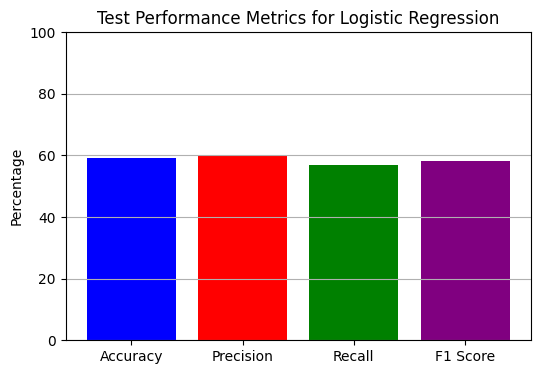

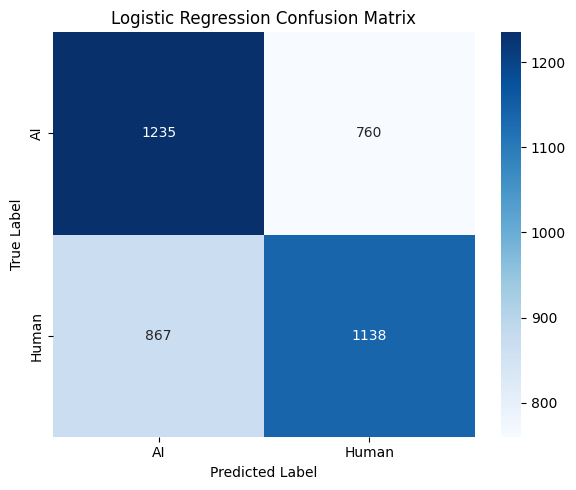

In [5]:
y_predictions = clf.predict(X_test)

# compute accuracy, precision, recall, and f1 for performance metrics
accuracy = 100.0 * np.mean(np.array(y_predictions) == np.array(y_test))
precision = 100.0 * precision_score(y_test, y_predictions, zero_division=0)
recall = 100.0 * recall_score(y_test, y_predictions, zero_division=0)
f1 = 100.0 * f1_score(y_test, y_predictions, zero_division=0)

# print metrics first
print("Logistic Regression Performance Metrics")
print(f"Test Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# bar chart for test metrics
plt.figure(figsize=(6, 4))
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(labels, metrics, color=['blue', 'red', 'green', 'purple'])
plt.title('Test Performance Metrics for Logistic Regression')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

cm = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['AI', 'Human'], yticklabels=['AI', 'Human'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()